## Практична робота № 4 Алгоритми пошуку та їх складність.
## Мета: опанувати основні алгоритми сортування та навчитись методам аналізу їх асимптотичної складності.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

**[GitHub](https://github.com/kefir4ikk)**

## Імпорт

In [1]:
import matplotlib.pyplot as plt
import time
import random
import math
import sys

sys.setrecursionlimit(20000)

## Завдання 1. Лінійний пошук (Linear Search)

**Теоретичні відомості:**
Алгоритм починає пошук з першого елемента масиву. Якщо поточний елемент не дорівнює шуканому, здійснюється перехід до наступного.
* **Найгірший випадок:** Елемент відсутній або знаходиться в кінці списку. Складність: $O(n)$.
* **Найкращий випадок:** Шуканий елемент знаходиться на першій позиції. Складність: $O(1)$.

**Шляхи покращення:**
Згідно з методичними вказівками, ефективність можна підвищити, якщо попередньо впорядкувати масив (для використання інших алгоритмів) . Також для самого лінійного пошуку використовують метод "бар'єру", щоб зменшити кількість перевірок у циклі.

In [2]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

arr_test = [10, 50, 30, 70, 80, 20]
print(f"Масив: {arr_test}")
print(f"Індекс елемента 30 (Linear): {linear_search(arr_test, 30)}")
print(f"Індекс елемента 99 (Linear): {linear_search(arr_test, 99)}")

Масив: [10, 50, 30, 70, 80, 20]
Індекс елемента 30 (Linear): 2
Індекс елемента 99 (Linear): -1


## Завдання 2. Бінарний пошук (Binary Search)

**Теоретичні відомості:**
Класичний алгоритм для **відсортованих** списків, що використовує стратегію «розділяй і володарюй».
1. Знаходиться середній елемент.
2. Якщо він дорівнює шуканому — кінець.
3. Якщо шукане менше середнього — шукаємо в лівій половині, якщо більше — в правій.

* **Асимптотична складність:** $O(\log n)$.

In [4]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    
    middle = (left + right) // 2
    
    if a_list[middle] == x:
        return middle
    elif a_list[middle] < x:
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)

sorted_arr = sorted(arr_test)
print(f"Відсортований масив: {sorted_arr}")
print(f"Індекс елемента 30 (Binary): {bin_search(sorted_arr, 30, 0, len(sorted_arr)-1)}")

Відсортований масив: [10, 20, 30, 50, 70, 80]
Індекс елемента 30 (Binary): 2


## Завдання 3. Тернарний пошук (Ternary Search)

**Опис:**
Алгоритм схожий на бінарний, але ділить масив не на дві, а на три частини за допомогою двох точок поділу ($m1$ і $m2$).

* **Складність:** $O(\log_3 n)$.
* **Порівняння:** Хоча основа логарифма 3 краща за 2, тернарний пошук виконує більше операцій порівняння на кожному кроці, тому на практиці часто працює повільніше за бінарний.

In [5]:
def ternary_search(a_list, x, left, right):
    if left > right:
        return -1
    
    mid1 = left + (right - left) // 3
    mid2 = right - (right - left) // 3
    
    if a_list[mid1] == x:
        return mid1
    if a_list[mid2] == x:
        return mid2
        
    if x < a_list[mid1]:
        return ternary_search(a_list, x, left, mid1 - 1)
    elif x > a_list[mid2]:
        return ternary_search(a_list, x, mid2 + 1, right)
    else:
        return ternary_search(a_list, x, mid1 + 1, mid2 - 1)

print(f"Індекс елемента 30 (Ternary): {ternary_search(sorted_arr, 30, 0, len(sorted_arr)-1)}")

Індекс елемента 30 (Ternary): 2


## Завдання 4. Експериментальне порівняння ефективності

Проведемо вимірювання часу виконання для списків різного розміру: від 100 до 200 000 елементів.

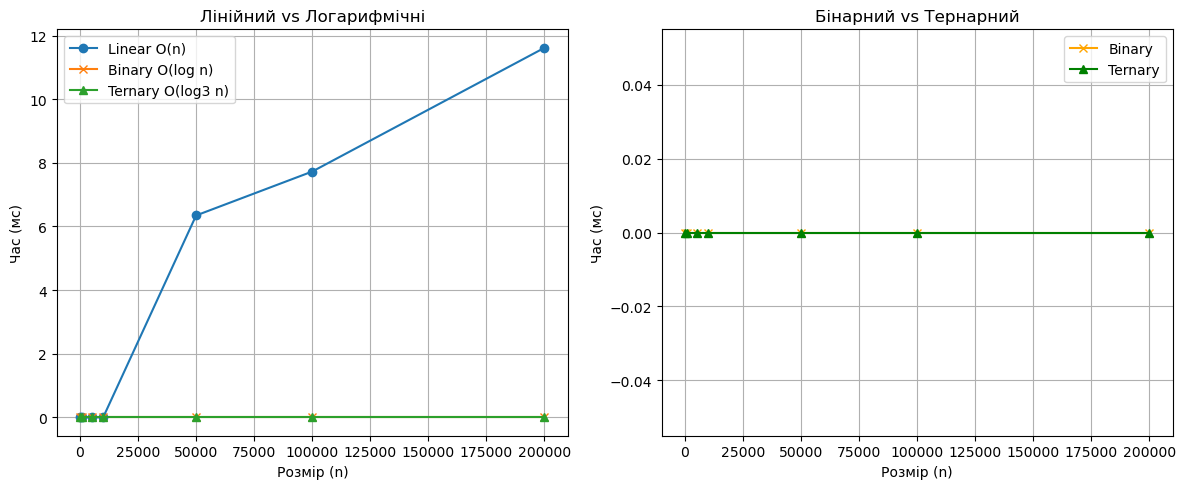

In [7]:
def measure_time(algorithm, arr, x, *args):
    start_time = time.time()
    algorithm(arr, x, *args)
    return (time.time() - start_time) * 1000 # переводимо в мілісекунди

sizes = [100, 1000, 5000, 10000, 50000, 100000, 200000]
linear_times = []
binary_times = []
ternary_times = []

for size in sizes:
    
    test_list = list(range(size))
    target = -1 # Найгірший випадок (елемента немає)
    
    # Linear
    l_time = measure_time(linear_search, test_list, target)
    linear_times.append(l_time)
    
    # Binary
    b_time = measure_time(bin_search, test_list, target, 0, len(test_list)-1)
    binary_times.append(b_time)
    
    # Ternary
    t_time = measure_time(ternary_search, test_list, target, 0, len(test_list)-1)
    ternary_times.append(t_time)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sizes, linear_times, label='Linear O(n)', marker='o')
plt.plot(sizes, binary_times, label='Binary O(log n)', marker='x')
plt.plot(sizes, ternary_times, label='Ternary O(log3 n)', marker='^')
plt.title('Лінійний vs Логарифмічні')
plt.xlabel('Розмір (n)')
plt.ylabel('Час (мс)')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(sizes, binary_times, label='Binary', marker='x', color='orange')
plt.plot(sizes, ternary_times, label='Ternary', marker='^', color='green')
plt.title('Бінарний vs Тернарний')
plt.xlabel('Розмір (n)')
plt.ylabel('Час (мс)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Аналіз результатів (Завдання 5-6)

1. **Вплив відсортованості:**
   * *Лінійний пошук* універсальний — працює з будь-якими даними.
   * *Бінарний та тернарний* працюють коректно **тільки** на відсортованих масивах. Якщо масив не відсортований, його сортування займе $O(n \log n)$, що повільніше за один прохід лінійного пошуку $O(n)$.

2. **Сценарії використання:**
   * **Лінійний:** Невеликі масиви; дані, що часто змінюються (додавання/видалення); невідсортовані дані.
   * **Бінарний:** Великі статичні масиви (наприклад, словники, бази даних), де дані впорядковані і пошук виконується часто.

## Відповіді на контрольні питання 

**1. Що таке алгоритм пошуку і чому він важливий?**

Алгоритм пошуку — це процедура знаходження певного елемента в контейнері (масиві, списку). Він важливий, оскільки пошук інформації є однією з найчастіших операцій у комп'ютерних науках та базах даних.

**2. Які основні критерії оцінки ефективності алгоритмів пошуку?**

Основними критеріями є асимптотична часова складність (швидкість роботи залежно від $n$) та використання пам'яті.

**3. Що таке лінійний пошук, і як він працює?**

Це метод перебору ("грубої сили"), який послідовно перевіряє кожен елемент масиву від початку до кінця, доки не знайде відповідність або не закінчиться список.

**4. Які умови повинні бути виконані для успішного застосування бінарного пошуку?**

Список має бути **відсортованим** . Також бажано мати прямий доступ до елементів за індексом (Random Access), інакше обчислення середнього елемента буде повільним.

**5. Які переваги та недоліки використання бінарного пошуку порівняно з іншими алгоритмами пошуку?**

* **Переваги:**
    * **Швидкість:** Основна перевага — асимптотична складність $O(\log n)$. Це робить його значно ефективнішим за лінійний пошук ($O(n)$) для великих обсягів даних.
    * **Ефективність:** Використовує стратегію «розділяй і володарюй», відкидаючи половину варіантів на кожному кроці.
* **Недоліки:**
    * **Вимога до даних:** Працює коректно виключно на **відсортованих** списках.
    * **Складність реалізації:** Вимагає коректного обчислення середнього індексу та управління межами, що складніше в реалізації, ніж простий цикл.

**6. Що таке тернарний пошук, і в чому його відмінність від бінарного пошуку?**

**Тернарний пошук** — це алгоритм типу «розділяй і володарюй», який на кожному кроці ділить відсортований масив не на дві, а на три частини. Для цього використовуються дві точки поділу ($m_1$ і $m_2$), які розбивають область пошуку на три сегменти.

**Відмінності від бінарного пошуку:**
1.  **Кількість частин:** Бінарний ділить масив на 2 частини, тернарний — на 3.
2.  **Точки поділу:** Бінарний обчислює один `middle`, тернарний — два (`mid1`, `mid2`).
3.  **Складність:** Основа логарифма у тернарного пошуку більша ($O(\log_3 n)$), що теоретично зменшує кількість ітерацій, але він виконує **більше порівнянь** на кожному кроці. Тому на практиці бінарний пошук часто виявляється оптимальнішим.